### import data and create ones column


In [1]:
# Redirct directory 


import os
os.chdir("/Users/cbuie/PycharmProjects/sf16_ds4/challenges/03-linear_splitting")
!ls

#import necessary pack.


import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from datetime import datetime

%matplotlib inline


2013_movies.csv README.md       submissions


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#drop na and create column of ones for constant term

data = pd.read_csv('2013_movies.csv')
data = data.dropna()
data['constant_term'] = 1

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 8 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null object
constant_term         87 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.1+ KB


### Exercise 3.1

##### Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). 

##### 1) How can you interpret the results of this model? 

There is not a relationship between DomesticTotalGross and the constant term.  While the constant stays flat the DomesticTotalGross increaseses. The beta coeff is constant at one.

#### 2) What does it predict?

It predicts a constant increase in y without an increase in x. This indicates that x has not affect on y.






In [4]:
# list(data.columns)

In [5]:
X = data['constant_term']
y = data['DomesticTotalGross']
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
ypred = olsres.predict(X)
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 11 Oct 2016   Prob (F-statistic):                nan
Time:                        11:38:28   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
constant_term  1.035e+08   9.43e+06     10.975

#### Make a plot of predictions against actual outcome. 

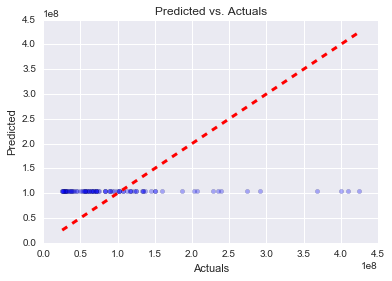

In [6]:
fig, ax = plt.subplots()
ax.scatter(y, ypred, alpha = .3)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3)
ax.set_title('Predicted vs. Actuals')
ax.set_xlabel('Actuals')
ax.set_ylabel('Predicted')
plt.show()

#### Make a histogram of residuals. How are the residuals distributed?



//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


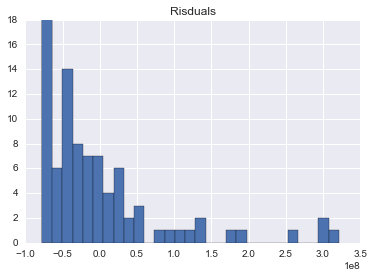

In [7]:
sns.plt.hist(olsres.resid, bins=(round(len(olsres.resid)*0.33,0)));
plt.title('Risduals');
# olsres.resid.plot()


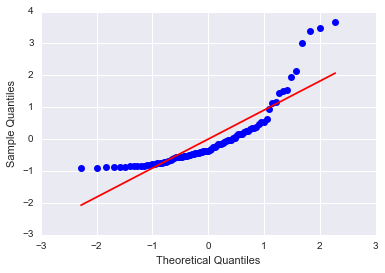

In [8]:
ax = plt.gca()
res = olsres.resid # residuals
fig = sm.qqplot(res,ax=ax, fit=True, line='r')
plt.show()

### Exercise 3.2

##### Repeat the process of challenge one: 
##### Add one continuous (numeric) predictor variable. 
##### Add plots of model prediction against your feature variable and residuals against feature variable. 
##### How can you interpret what's happening in the model?
As we add a new Beta coeff that has a stronger correlation we can see a relationship emerging.


In [9]:
data2 = data[['DomesticTotalGross', 'constant_term','Budget']].reset_index()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
index                 87 non-null int64
DomesticTotalGross    87 non-null int64
constant_term         87 non-null int64
Budget                87 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.8 KB


In [10]:
X2 = data[['Budget', 'constant_term' ]]
y2 = data['DomesticTotalGross']
olsmod = sm.OLS(y2, X2)
olsres2 = olsmod.fit()
ypred2 = olsres2.predict(X2)
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           1.19e-07
Time:                        11:38:35   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Budget            0.7831      0.135      5.782

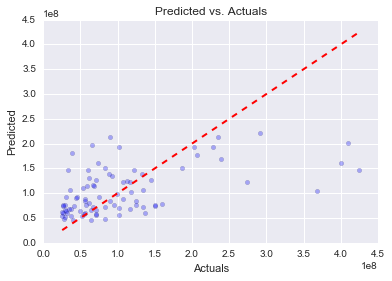

In [11]:
fig, ax = plt.subplots()
ax.scatter(y2, ypred2, alpha = .3)
ax.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'r--', lw=2)
ax.set_title('Predicted vs. Actuals')
ax.set_xlabel('Actuals')
ax.set_ylabel('Predicted')
plt.show()

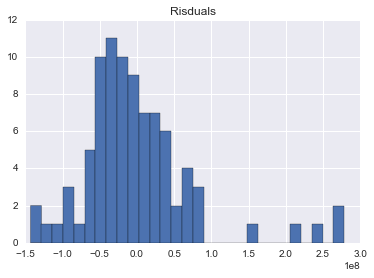

In [12]:
sns.plt.hist(olsres2.resid, bins = round(len(olsres2.resid)*0.33,0));
plt.title('Risduals');


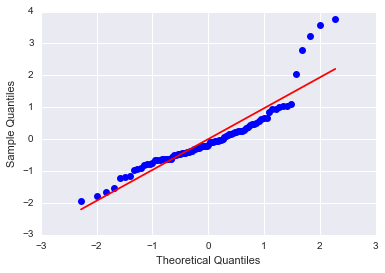

In [13]:
ax = plt.gca()
res = olsres2.resid # residuals
fig = sm.qqplot(res,ax=ax, fit=True, line='r')
plt.show()

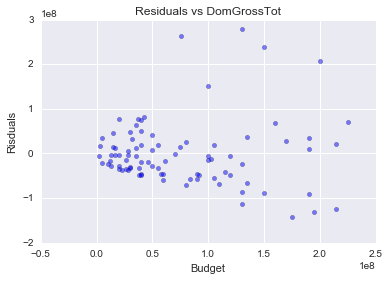

In [14]:

plt.scatter(data2['Budget'], olsres2.resid, alpha = 0.5)
plt.xlabel('Budget')
plt.ylabel('Risduals')
plt.title('Residuals vs DomGrossTot')



### Exercise 3.3

#### Repeat the process of challenge 1, but add a categorical feature (like genre). 
#### You will have to convert a column of text into a number of numerical columns. 
#### How can you interpret what is happening to the model?

In [15]:
data3 = data[['constant_term','Rating','DomesticTotalGross']].reset_index()
data3 = pd.concat([data3, pd.get_dummies(data3['Rating'])], axis=1)
data3 = data3.drop(['Rating'],axis=1)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
index                 87 non-null int64
constant_term         87 non-null int64
DomesticTotalGross    87 non-null int64
PG                    87 non-null float64
PG-13                 87 non-null float64
R                     87 non-null float64
dtypes: float64(3), int64(3)
memory usage: 4.1 KB


In [16]:
X3 = data3[['PG-13','R', 'constant_term']]
y3 = data3['DomesticTotalGross']
olsmod = sm.OLS(y3, X3)
olsres3 = olsmod.fit()
ypred3 = olsres3.predict(X3)
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.242
Date:                Tue, 11 Oct 2016   Prob (F-statistic):             0.0440
Time:                        11:38:42   Log-Likelihood:                -1711.2
No. Observations:                  87   AIC:                             3428.
Df Residuals:                      84   BIC:                             3436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
PG-13         -1.422e+07   2.66e+07     -0.534

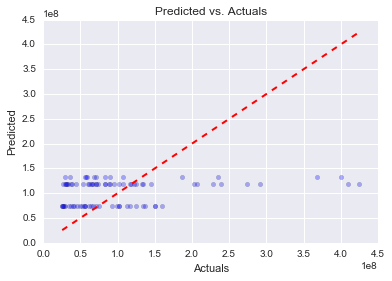

In [17]:
fig, ax = plt.subplots()
ax.scatter(y3, ypred3, alpha = .3)
ax.plot([y3.min(), y3.max()], [y3.min(), y3.max()], 'r--', lw=2)
ax.set_title('Predicted vs. Actuals')
ax.set_xlabel('Actuals')
ax.set_ylabel('Predicted')
plt.show()

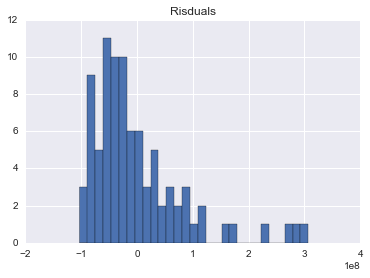

In [18]:
sns.plt.hist(olsres3.resid, bins = round(len(olsres3.resid)*.33,0));
plt.title('Risduals');

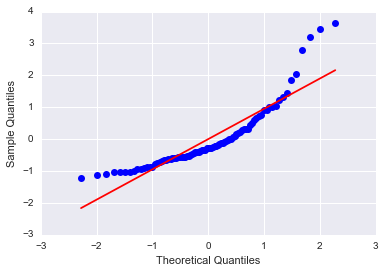

In [19]:
ax = plt.gca()
res = olsres3.resid # residuals
fig = sm.qqplot(res,ax=ax, fit=True, line='r')
plt.show()

#### Exercise 3.4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 8 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null object
constant_term         87 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.1+ KB


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


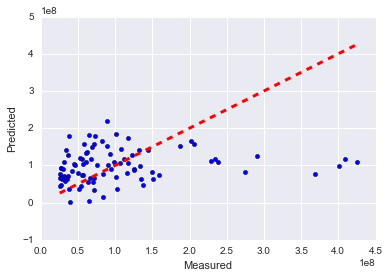

In [185]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

X = data[['Budget','Runtime','ReleaseDate']]
y = data['DomesticTotalGross']
X['Budget'] = np.sqrt(data['Budget'])
X['month'] = pd.DatetimeIndex(X['ReleaseDate']).month
# X = pd.concat([X, pd.get_dummies(X['month'])], axis=1)
X = pd.concat([X, pd.get_dummies(data['Rating'])], axis=1)
X = X.drop(['ReleaseDate'], axis=1)
X = X.drop(['month'], axis=1)

# Initialize linear model
lr = linear_model.LinearRegression()
lr_fit = lr.fit(X, y)
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [192]:
lr_fit.score(X,y)
# The coefficients
print ('Results from a 10k x-validated model')
print(list(X.columns))
print('Coefficients: \n', lr_fit.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.sqrt(np.mean((lr_fit.predict(X) - y) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr_fit.score(X, y))


Results from a 10k x-validated model
['Budget', 'Runtime', 'PG', 'PG-13', 'R']
('Coefficients: \n', array([  1.15168239e+04,   6.16621982e+05,   1.59783549e+07,
        -7.86051101e+06,  -8.11784388e+06]))
Mean squared error: 74094712.61
Variance score: 0.28


#### Exercise 3.5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [197]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [198]:
model_lr = linear_model.LinearRegression(fit_intercept=True, normalize=True)
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict(X_test)
RMSE_lr = np.sqrt(np.sum((pred_vals_lr - y_test)**2)/len(y_test))


print 'Train set: %.2f' % model_lr.score(X_train,y_train)
print 'Test set: %.2f' % model_lr.score(X_test,y_test)



Train set: 0.23
Test set: 0.37
